# Case Study on Correlation and Regression

 A textile company regularly spent money on five advertising companies for their ads.
 
 1) First of all, check whether there is any relationship between the amount spent for advertising through five different            companies and profit generated.
 
 2) Build a regression model to predict the profit from the given data and comment your findings on it.
 
 3) Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
 
    Add1(in Thousands) 290.

    Add2(in Thousands) 312.

    Add3(in Thousands) 309.

    Add4(in Thousands) 298.

    Add5(in Thousands) 320.

In [55]:
#import all the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [56]:
#load the dataset 
data = pd.read_csv('Add_sales_data_2018.csv')
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [74]:
#analyse the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [75]:
#check for null values
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

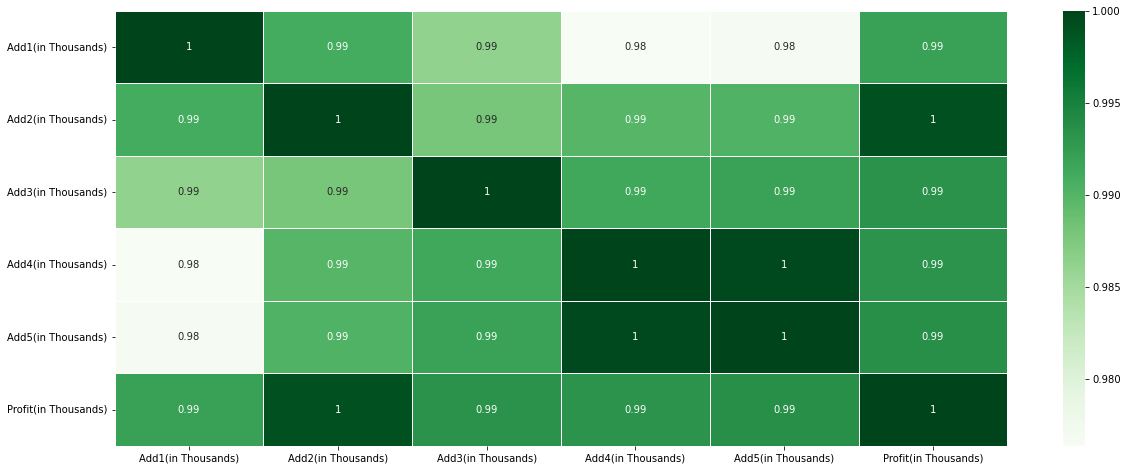

In [59]:
#finding correlation between the variables using corr function
corrmatrix = data.corr()
plt.subplots(figsize = (20,8))
sns.heatmap(corrmatrix,annot = True,linewidth = 1,cmap ="Greens")

Insight:

    From the above heatmap it's clear that ,the amount spent for advertising through five different companies 
    and profit generated are stongly correlated.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it.

In [60]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [61]:
#spliting independent and dependent variables to x and y respectively.
y = data['Profit(in Thousands)']        #profit is the target(dependent variable).

#from the data set date value is not needed for our model.
x = data.drop(['Profit(in Thousands)','Date'],axis = 1)    #Adds are the predictor(independent variables)

In [62]:
#splitting the x & y variables into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = 0.25)

In [63]:
#importing linear regression  model from sklearn library

from sklearn import linear_model
lrg = linear_model.LinearRegression()
model = lrg.fit(x_train,y_train)

In [64]:
#predicting the target for the x_test
pred = model.predict(x_test)
pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [69]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [70]:
#checking the efficiency of the model by finding mean squared error value.

from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,pred))
print("Rounded  is MSE : %0.2f "%mean_squared_error(y_test,pred))

MSE is : 3.181463894434722e-25
Rounded  is MSE : 0.00 


Insights : The mean squared error is approximately equal to zero ,
    that means the predicted values and actual values are so close .
    Hence the model can be used for predictions.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertising ,Add1(in Thousands) 290 ,Add2(in Thousands) 312 ,Add3(in Thousands) 309 ,Add4(in Thousands) 298 ,Add5(in Thousands) 320.

In [71]:
#method_1 : assigning the values into a dictionary

ck = {"Add1(in Thousands)":[290],
      "Add2(in Thousands)":[312],
      "Add3(in Thousands)":[309],
      "Add4(in Thousands)":[298],
      "Add5(in Thousands)":[320]}
CK = pd.DataFrame(ck)
CK

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [72]:
model.predict(CK)

array([5820.06])

In [73]:
#method_2 : directly assigning the values
model.predict([[290,312,309,298,320]]).item()

5820.060000000001

Insights :
         5820.06(in thousands) would  be the profit generated by the company, if they wish to spend the amount as given.